# Accessing, visualizing and editing feature data

 - from feature service with multiple layers
 - from feature collection items
 - from a map service with feature access enabled

In [1]:
from arcgis.gis import GIS

In [2]:
gis = GIS(profile='playfround_portal_admin')

Search for a feature service titled 'fortune_500_styled_wfl'

In [20]:
search_result = gis.content.search('title:fortune_500_styled_wfl', 'Feature Layer')
search_result

[<Item title:"fortune_500_styled_wfl" type:Feature Layer Collection owner:andrew>]

<Item title:"fortune_500_styled_wfl" type:Feature Layer Collection owner:andrew>
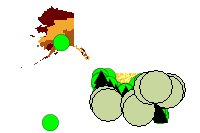

In [21]:
fortune_fl_item = search_result[0]
fortune_fl_item

In [5]:
fortune_fl_item.url

'http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer'

Notice that this item represents a **Feature Layer Collection**

### Accessing a Feature Layer Collection
A Feature Layer Collection is simply a collection of Feature Layer objects

In [22]:
from arcgis.features import FeatureLayerCollection

Notice the url ends with a `FeatureServer`. We can use this URL to instantiate a `FeatureLayerCollection` object.

In [23]:
flc = FeatureLayerCollection(fortune_fl_item.url, gis)
type(flc)

arcgis.features.layer.FeatureLayerCollection

In [8]:
flc.layers

[<FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/0">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/1">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/2">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/3">]

In [24]:
flc_ly1 = flc.layers[0]
type(flc_ly1)

arcgis.features.layer.FeatureLayer

Thus `FeatureLayerCollection.layers` = `[FeatureLayer]` objects

## Accessing a Feature Layer

In [25]:
fl_list = fortune_fl_item.layers
type(fl_list[0])

arcgis.features.layer.FeatureLayer

Thus FeatureLayer objects can be directly obtained from Item objects as well

In [26]:
fl_list

[<FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/0">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/1">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/2">,
 <FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/3">]

In [ ]:
for layer in fl_list:
    print(layer.properties.name)

In [28]:
layer.properties

{
  "currentVersion": 10.5,
  "id": 3,
  "name": "Counties",
  "type": "Feature Layer",
  "serviceItemId": "58750386d8814bd590e3a9f2b6850da9",
  "displayField": "name",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1507043492865
  },
  "relationships": null,
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsTruncate": false,
  "supportsAttachmentsByUploadId": false,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": false,
  "supportsApplyEditsWithGlobalIds": false,
  "supportsMultiScaleGeometry": true,
  "hasGeometryProperties": true,
  "geometryProperties": {
    "shapeAreaFieldName": "Shape__Area",
    "shapeLengthFieldName": "Shape__Length",
    "units": "esriMeters"
  },
  "advancedQueryCapabilities": {
    "

In [29]:
cities_million_pop = fl_list[0]

In [30]:
cities_million_pop.properties.extent

{
  "xmin": -11035466.292279908,
  "ymin": 3120385.1741954507,
  "xmax": -7934543.423767514,
  "ymax": 6184266.301957696,
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  }
}

In [31]:
map1 = gis.map('Philadelphia, PA', zoomlevel=7)
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=7.0)

In [32]:
map1.add_layer(cities_million_pop, {"renderer":"ClassedSizeRenderer", "field_name": "pop"})

You can visualize `FeatureLayer` objects on the map widget

## Accessing FeatureSet objects
Let us query the FeatureLayer objected created above to get a `FeatureSet` in return

Let us write an empty query so we can get all the features

In [33]:
cities_mil_fset = cities_million_pop.query()
type(cities_mil_fset)

arcgis.features.feature.FeatureSet

In [34]:
cities_mil_fset.geometry_type

'esriGeometryPoint'

In [35]:
cities_mil_fset.spatial_reference

{'wkid': 102100, 'latestWkid': 3857}

In [36]:
cities_mil_fset.sdf.head()

,SHAPE,feature,globalid,name,objectid,pop
0,"{""x"": -13162974.851300001, ""y"": 4035820.211800...","Population greater than 999,999 County Seat",{EBB04276-5FEC-4CC5-AA3D-39F0833AEC95},Los Angeles,1,3485398.0
1,"{""x"": -13041954.6204, ""y"": 3857562.1829999983,...","Population greater than 999,999 County Seat",{73C9B31E-7749-41A3-B2BA-1C7F50FCA23F},San Diego,2,1110549.0
2,"{""x"": -8654533.0388, ""y"": 4789915.690899998, ""...",created with Python API,{973355DD-73E4-43AB-B656-BFB8987E5B69},New York,13,8175133.0
3,"{""x"": -8367174.4026, ""y"": 4859017.708499998, ""...","Population greater than 999,999 County Seat",{918E688F-4D5D-4EC3-8B4B-6AD1FA3FDF7C},Philadelphia,4,1585577.0
4,"{""x"": -10775794.1317, ""y"": 3866612.282399997, ...","Population greater than 999,999 County Seat",{9F4E803A-DDBD-486A-AE9A-A1660C5E41FD},Dallas,5,1006877.0


In [37]:
type(cities_mil_fset.sdf)

pandas.core.frame.DataFrame

## Accessing Feature objects
Now get the `Features` from cities over 1 million population `FeatureSet`

In [38]:
cities_mil_features = cities_mil_fset.features
type(cities_mil_features)

list

In [39]:
len(cities_mil_features)

18

In [40]:
type(cities_mil_features[0])

arcgis.features.feature.Feature

In [41]:
f1= cities_mil_features[0]

In [42]:
f1.fields

['objectid', 'feature', 'name', 'pop', 'globalid', 'SHAPE']

# Editing features

In [38]:
cities_million_pop.properties.capabilities

'Query'

### Editing the FeatureLayerCollection definition

In [39]:
flc.manager.update_definition({'capabilities':'Query'})

{'success': True}

In [40]:
flc.properties.capabilities

'Create,Delete,Query,Update,Editing,Extract'

### Edit NYC name

In [28]:
# select 'NAME=New York'
ny_feature = [f for f in cities_mil_features if f.attributes['name']=='New York'][0]
ny_feature.attributes

{'objectid': 3,
 'feature': 'Population greater than 999,999   County Seat',
 'name': 'New York',
 'pop': 7322564.0,
 'globalid': '{29AA1545-46A4-450D-A4B5-1A5A0E85B247}'}

In [29]:
import copy
ny_edit = copy.deepcopy(ny_feature)
ny_edit.attributes['name'] = 'New York City'

In [30]:
ny_edit

{"geometry": {"x": -8238277.7566, "y": 4970310.197099999}, "attributes": {"objectid": 3, "feature": "Population greater than 999,999   County Seat", "name": "New York City", "pop": 7322564.0, "globalid": "{29AA1545-46A4-450D-A4B5-1A5A0E85B247}"}}

In [31]:
update_result = cities_million_pop.edit_features(updates=[ny_edit])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 3,
   'globalId': '{29AA1545-46A4-450D-A4B5-1A5A0E85B247}',
   'success': True}],
 'deleteResults': [],
 'attachments': {'addResults': [], 'updateResults': [], 'deleteResults': []}}